# HOMEWORK - RAKAMIN DSF32

## LOAN CUSTOMER

**Dataset ini menggambarkan perilaku dan profil pelanggan di
sebuah bank yang menyediakan program pinjaman untuk
pembelian properti.**

Bayangkan kamu sedang bekerja di sebuah bank yang menyediakan layanan pinjaman
uang untuk pembelian properti. Pelanggan-pelanggan program ini merupakan nasabah di
bank tersebut. Kamu diberikan data yang berisi semua data pribadi nasabah dan
sekaligus rekam jejak kreditnya dalam satu periode. Saat ini kamu diminta untuk
menganalisis bagaimana perilaku pelanggan yang mengajukan pinjaman ke bank
tersebut




In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [198]:
df1 = pd.read_csv('csv/loan_customer.csv')

In [199]:
df1.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [200]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [201]:
df1.shape

(621, 17)

terdapat 621 baris, dan 17 kolom

## Data Preprocessing

- Handling missing value
- Handling duplicated data
- Handling outlier
- Feature encoding

In [202]:
df1.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [203]:
round(df1.isnull().sum()/df1.shape[0]*100, 2)

loan_id                0.00
birth_date             7.89
phone_number           8.37
gender                 2.09
married                0.48
dependents             2.58
education              0.16
self_employed          5.31
applicant_income       1.45
coapplicant_income     0.00
loan_amount            0.00
loan_term_month        0.00
loan_term_year         0.00
credit_history         8.21
has_credit_card       85.83
property_type          0.16
loan_status            0.00
dtype: float64

- yang memiliki banyak missing values adalah kolom has_credit_card yaitu sebanyak 533 atau 85%

In [204]:
df1.duplicated().sum()

1

In [205]:
df1.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.690000e+02,612.000000,621.000000,621.000000,621.000000,621.000000,570.000000
mean,5.468552e+11,5681.549020,1616.874267,145133.655395,342.608696,28.550725,0.842105
std,1.987860e+11,9056.454103,2915.075138,84011.115879,64.090837,5.340903,0.364963
min,6.281101e+10,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,6.281140e+11,2874.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281343e+11,3812.500000,1167.000000,125000.000000,360.000000,30.000000,1.000000
75%,6.285665e+11,5815.750000,2302.000000,165000.000000,360.000000,30.000000,1.000000
max,6.287799e+11,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000


**has credit card**

In [206]:
df1['has_credit_card'].value_counts()

no     52
yes    36
Name: has_credit_card, dtype: int64

- dilihat dari sini 15% dari has credit memiliki dominan No daripada Yes
- karena 85% NaN maka pertimbangannya adalah penghapusan kolom

In [207]:
df1.drop(['has_credit_card'], axis=1, inplace=True)

In [208]:
df1.head(2)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,studio,REJECT


In [209]:
df1.columns

Index(['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history', 'property_type', 'loan_status'],
      dtype='object')

### Handling Missing Values and Handling Outlier

**phone number**

In [210]:
df1.dropna(inplace=True)

**gender**

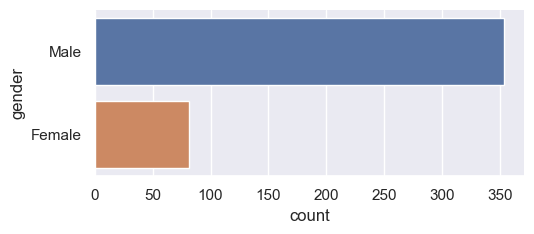

In [211]:
sns.catplot(y='gender', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

**married**

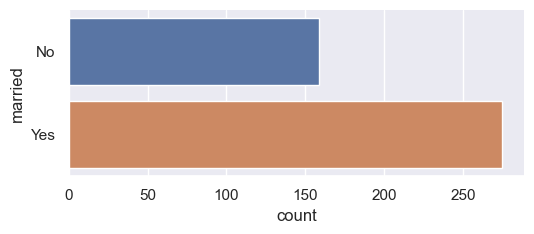

In [212]:
sns.catplot(y='married', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

**dependents**

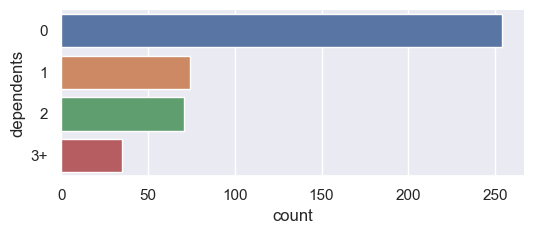

In [213]:
sns.catplot(y='dependents', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

**education**

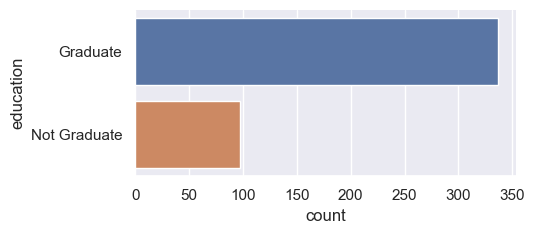

In [214]:
sns.catplot(y='education', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

In [215]:
df1.columns

Index(['loan_id', 'birth_date', 'phone_number', 'gender', 'married',
       'dependents', 'education', 'self_employed', 'applicant_income',
       'coapplicant_income', 'loan_amount', 'loan_term_month',
       'loan_term_year', 'credit_history', 'property_type', 'loan_status'],
      dtype='object')

**self_employed**

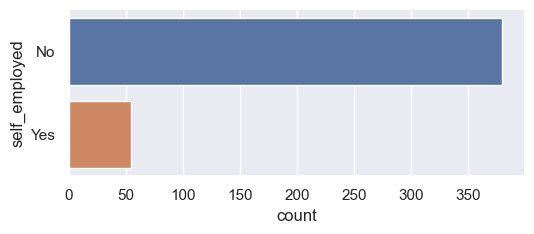

In [216]:
sns.catplot(y='self_employed', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

_conclusion_: 
- _Most of those who apply for loans are men with university degrees, self employed_
- _Most of those who apply for loans are married_
- _for the level of dependents they are mostly at levels 0, 1 and 2_

**applicant_income**

<AxesSubplot:xlabel='applicant_income', ylabel='Density'>

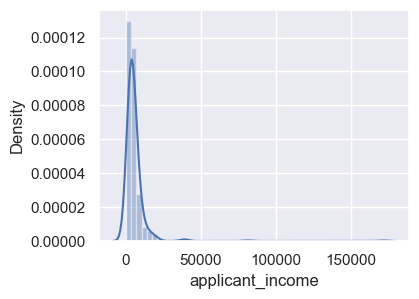

In [217]:
fig = plt.figure(figsize=(4, 3))
sns.distplot(df1['applicant_income'])

<AxesSubplot:xlabel='applicant_income'>

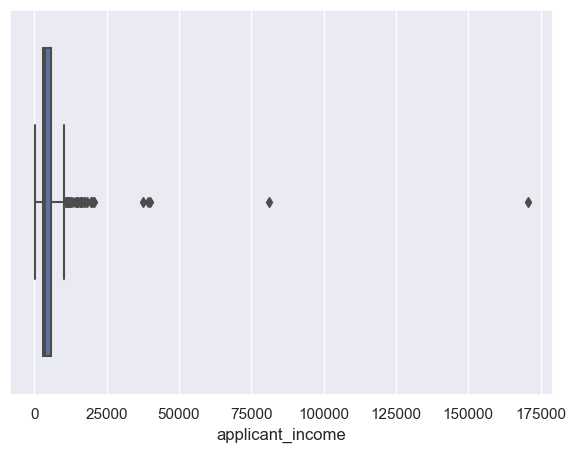

In [218]:
fig = plt.figure(figsize=(7, 5))
sns.boxplot(x='applicant_income', data=df1)

**loan_term_month**

In [219]:
df1['loan_term_month'].value_counts()

360    372
180     31
480     11
300      9
84       3
120      2
60       2
240      2
36       2
Name: loan_term_month, dtype: int64

<AxesSubplot:xlabel='loan_term_month', ylabel='Density'>

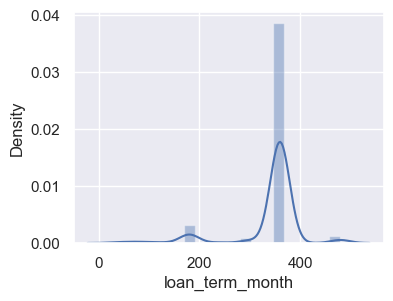

In [220]:
fig = plt.figure(figsize=(4, 3))
sns.distplot(df1['loan_term_month'])

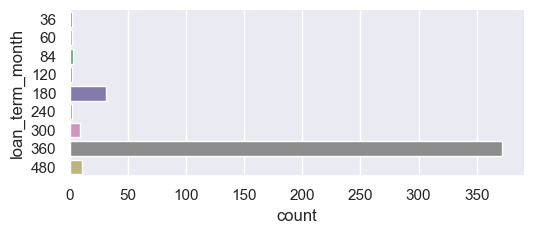

In [221]:
sns.catplot(y='loan_term_month', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

**loan_term_year**

In [222]:
df1['loan_term_year'].isnull().sum()

0

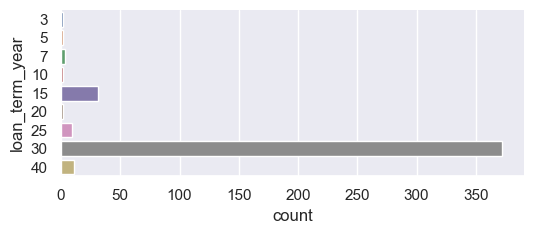

In [223]:
sns.catplot(y='loan_term_year', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

<AxesSubplot:xlabel='loan_term_year', ylabel='Density'>

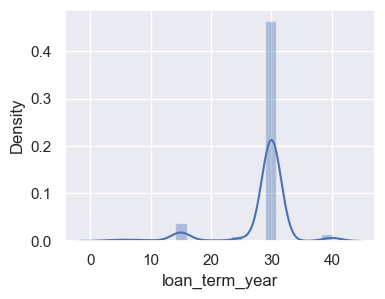

In [224]:
fig = plt.figure(figsize=(4, 3))
sns.distplot(df1['loan_term_year'])

**loan_amount**

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

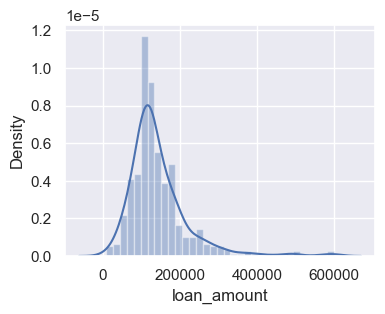

In [225]:
fig = plt.figure(figsize=(4, 3))
sns.distplot(df1['loan_amount'])

<AxesSubplot:xlabel='loan_amount'>

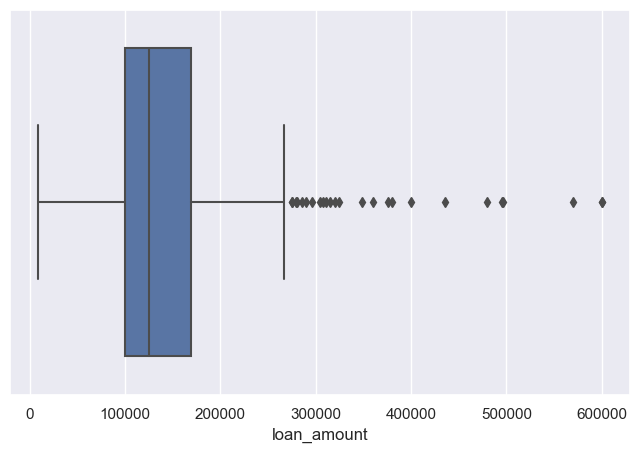

In [226]:
fig = plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_amount', data=df1)

**credit_history**

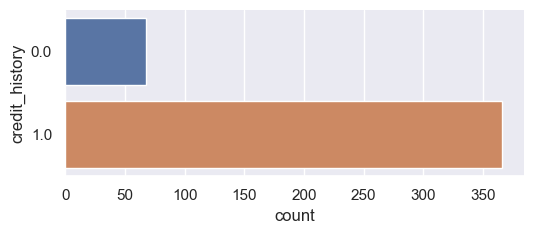

In [227]:
sns.catplot(y='credit_history', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

**property_type**

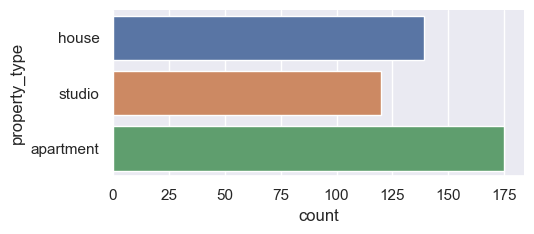

In [228]:
sns.catplot(y='property_type', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

**loan_status**

In [229]:
df1['loan_status'].isnull().sum()

0

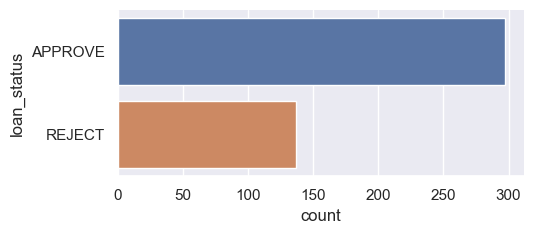

In [230]:
sns.catplot(y='loan_status', kind='count', data=df1, height=2.5, aspect=2.2, palette = 'deep')

**coapplicant_income**

In [231]:
df1['coapplicant_income'].isnull().sum()

0

<AxesSubplot:xlabel='coapplicant_income', ylabel='Density'>

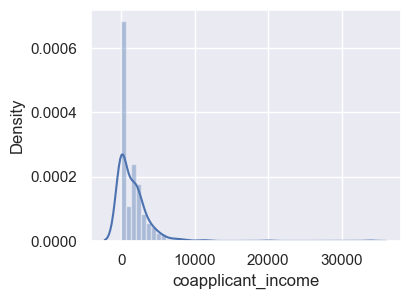

In [232]:
fig = plt.figure(figsize=(4, 3))
sns.distplot(df1['coapplicant_income'])

<AxesSubplot:xlabel='coapplicant_income'>

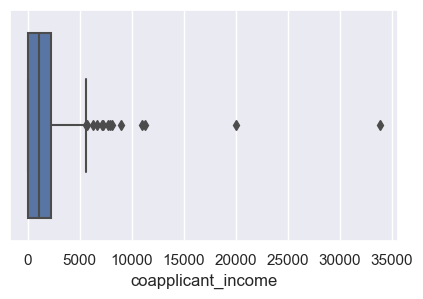

In [233]:
fig = plt.figure(figsize=(5,3))
sns.boxplot(x='coapplicant_income', data=df1)

### checking to handle or not

**coapplicant_income**

In [234]:
Q1 = df1['coapplicant_income'].quantile(0.25)
Q3 = df1['coapplicant_income'].quantile(0.75)
IQR = Q3 - Q1

In [235]:
IQR

2252.25

In [236]:
lower_lin = Q1 - 1.5 * IQR
upper_lin = Q3 + 1.5 * IQR

In [237]:
lower_lin

-3378.375

In [238]:
upper_lin

5630.625

In [239]:
df1['coapplicant_income'].describe()

count      434.000000
mean      1549.649585
std       2538.432431
min          0.000000
25%          0.000000
50%       1105.500000
75%       2252.250000
max      33837.000000
Name: coapplicant_income, dtype: float64

**handle coapp**

In [240]:
outlier_15_low = (df1['coapplicant_income'] < lower_lin)

In [241]:
outlier_15_up = (df1['coapplicant_income'] > upper_lin)

In [242]:
len(df1['coapplicant_income']) - (len( df1['coapplicant_income'][outlier_15_low]) + len( df1['coapplicant_income'][outlier_15_up])) 

420

In [243]:
df1['coapplicant_income'][(outlier_15_low | outlier_15_up)]

9      10968.0
12      8106.0
92      5654.0
123     8980.0
136     7750.0
178    11300.0
181     7250.0
243     5701.0
254     7101.0
352     6250.0
376     7873.0
407    20000.0
518     6666.0
586    33837.0
Name: coapplicant_income, dtype: float64

In [244]:
df1['coapplicant_income'][-(outlier_15_low | outlier_15_up)]

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
615    1950.0
616       0.0
617       0.0
618     240.0
619       0.0
Name: coapplicant_income, Length: 420, dtype: float64

In [245]:
df1 = df1[~(outlier_15_low | outlier_15_up)]

In [246]:
df1['coapplicant_income'].describe()

count     420.000000
mean     1250.266476
std      1435.570803
min         0.000000
25%         0.000000
50%      1005.000000
75%      2114.250000
max      5625.000000
Name: coapplicant_income, dtype: float64

**loan_amount**

In [247]:
Q1 = df1['loan_amount'].quantile(0.25)
Q3 = df1['loan_amount'].quantile(0.75)
IQR = Q3 - Q1

In [248]:
IQR

62500.0

In [249]:
lower_lin = Q1 - 1.5 * IQR
upper_lin = Q3 + 1.5 * IQR

In [250]:
lower_lin

6250.0

In [251]:
upper_lin

256250.0

In [252]:
df1['loan_amount'].describe()

count       420.000000
mean     141052.380952
std       75185.099315
min        9000.000000
25%      100000.000000
50%      124000.000000
75%      162500.000000
max      600000.000000
Name: loan_amount, dtype: float64

In [253]:
outlier_15_low = (df1['loan_amount'] < lower_lin)

In [254]:
outlier_15_up = (df1['loan_amount'] > upper_lin)

In [255]:
len(df1['loan_amount']) - (len( df1['loan_amount'][outlier_15_low]) + len( df1['loan_amount'][outlier_15_up])) 

394

In [256]:
df1['loan_amount'][(outlier_15_low | outlier_15_up)]

5      267000
21     315000
34     320000
54     286000
65     258000
120    259000
156    600000
162    275000
234    280000
259    304000
280    436000
311    480000
328    376000
354    308000
373    570000
385    296000
395    275000
414    360000
519    311000
530    400000
541    324000
562    260000
566    600000
569    258000
599    260000
611    496000
Name: loan_amount, dtype: int64

In [257]:
df1['loan_amount'][-(outlier_15_low | outlier_15_up)]

0      100000
1      128000
2       66000
3      120000
4      141000
        ...  
615    108000
616     71000
617     40000
618    253000
619    187000
Name: loan_amount, Length: 394, dtype: int64

In [258]:
df1 = df1[~(outlier_15_low | outlier_15_up)]

**handle loan amount**

In [259]:
outlier_15_low = (df1['loan_amount'] < lower_lin)

In [260]:
outlier_15_up = (df1['loan_amount'] > upper_lin)

In [261]:
len(df1['loan_amount']) - (len( df1['loan_amount'][outlier_15_low]) + len( df1['loan_amount'][outlier_15_up])) 

394

In [262]:
df1['loan_amount'][(outlier_15_low | outlier_15_up)]

Series([], Name: loan_amount, dtype: int64)

In [263]:
df1['loan_amount'][-(outlier_15_low | outlier_15_up)]

0      100000
1      128000
2       66000
3      120000
4      141000
        ...  
615    108000
616     71000
617     40000
618    253000
619    187000
Name: loan_amount, Length: 394, dtype: int64

In [264]:
df1 = df1[~(outlier_15_low | outlier_15_up)]

In [265]:
df1['loan_amount'].describe()

count       394.000000
mean     127076.142132
std       45777.137858
min        9000.000000
25%      100000.000000
50%      120000.000000
75%      153750.000000
max      255000.000000
Name: loan_amount, dtype: float64

**handle applicant income**

In [266]:
Q1 = df1['applicant_income'].quantile(0.25)
Q3 = df1['applicant_income'].quantile(0.75)
IQR = Q3 - Q1

In [267]:
IQR

2669.75

In [268]:
lower_lin = Q1 - 1.5 * IQR
upper_lin = Q3 + 1.5 * IQR

In [269]:
lower_lin

-1219.125

In [270]:
upper_lin

9459.875

In [271]:
df1['applicant_income'].describe()

count       394.000000
mean       5103.213198
std        9135.747377
min         150.000000
25%        2785.500000
50%        3737.500000
75%        5455.250000
max      170578.000000
Name: applicant_income, dtype: float64

In [272]:
outlier_15_low = (df1['applicant_income'] < lower_lin)

In [273]:
outlier_15_up = (df1['applicant_income'] > upper_lin)

In [274]:
len(df1['applicant_income']) - (len( df1['applicant_income'][outlier_15_low]) + len( df1['applicant_income'][outlier_15_up])) 

369

In [275]:
df1['applicant_income'][(outlier_15_low | outlier_15_up)]

107     11417.0
116     14583.0
139     14999.0
145     11757.0
147     14866.0
149     10000.0
158      9538.0
186     39147.0
192     12000.0
200     11000.0
211     10000.0
247      9703.0
255     16250.0
272     11146.0
286     20667.0
291      9508.0
374     15759.0
448     37719.0
480     16525.0
488     10833.0
498     17263.0
514     13262.0
539     18165.0
604      9963.0
608    170578.0
Name: applicant_income, dtype: float64

In [276]:
df1['applicant_income'][-(outlier_15_low | outlier_15_up)]

0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
615    3232.0
616    2900.0
617    4106.0
618    8072.0
619    7583.0
Name: applicant_income, Length: 369, dtype: float64

In [277]:
df1 = df1[~(outlier_15_low | outlier_15_up)]

## Analisis minat pelanggan berdasarkan pada tipe properti 

In [278]:
dfw = df1.groupby(['gender', 'property_type'], as_index=False).sum()

In [279]:
df1.groupby(["gender"])["property_type"].count()

gender
Female     68
Male      301
Name: property_type, dtype: int64

In [280]:
df1.groupby(["property_type"])["gender"].count()

property_type
apartment    151
house        116
studio       102
Name: gender, dtype: int64

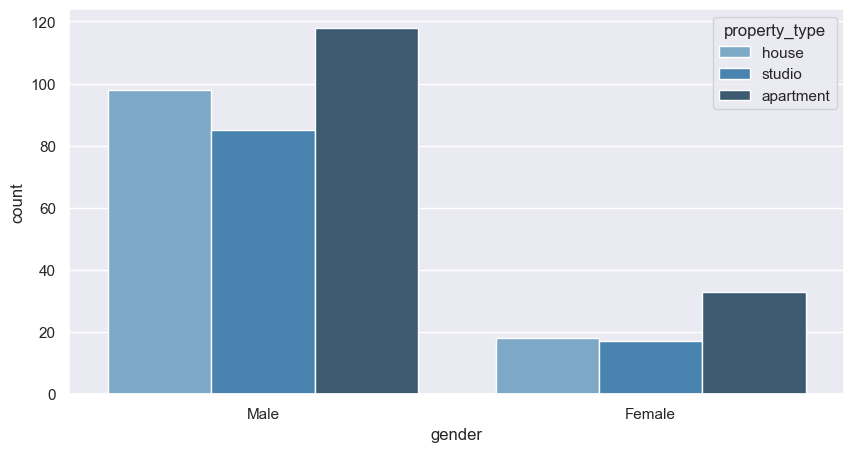

In [281]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df1['gender'], hue=df1['property_type'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

In [292]:
grouped = df1.groupby(['gender', 'loan_amount', 'property_type'])

In [294]:
result = grouped.sum()
result

phone_number  applicant_income  \
gender loan_amount property_type                                   
Female 9000        house          6.287792e+11            2378.0   
       44000       apartment      6.281193e+11            4166.0   
       46000       studio         6.285745e+11            2378.0   
       53000       apartment      6.287740e+10            1963.0   
       56000       studio         6.285683e+11            2507.0   
...                                        ...               ...   
Male   244000      house          6.285761e+11            9166.0   
       246000      apartment      6.285663e+11            8333.0   
       250000      apartment      6.281184e+11            6065.0   
       253000      house          6.281158e+11            8072.0   
       255000      apartment      6.281354e+10            4583.0   

                                  coapplicant_income  loan_term_month  \
gender loan_amount property_type                                        
Female 9000        house                         0.0              360   
       44000       apartment                     0.0              360   
       46000       studio                        0.0              360   
       53000       apartment                     0.0              360   
       56000       studio                        0.0              360   
...                                              ...              ...   
Male   244000      house                         0.0              360   
       246000      apartment                     0.0              360   
       250000      apartment                  2004.0              360   
       253000      house                       240.0              360   
       255000      apartment                  5625.0              360   

                                  loan_term_year  credit_history  
gender loan_amount property_type                                  
Female 9000        house                      30             1.0  
       44000       apartment                  30             1.0  
       46000       studio                     30             1.0  
       53000       apartment                  30             1.0  
       56000       studio                     30             1.0  
...                                          ...             ...  
Male   244000      house                      30             1.0  
       246000      apartment                  30             1.0  
       250000      apartment                  30             1.0  
       253000      house                      30             1.0  
       255000      apartment                  30             1.0  

[259 rows x 6 columns]

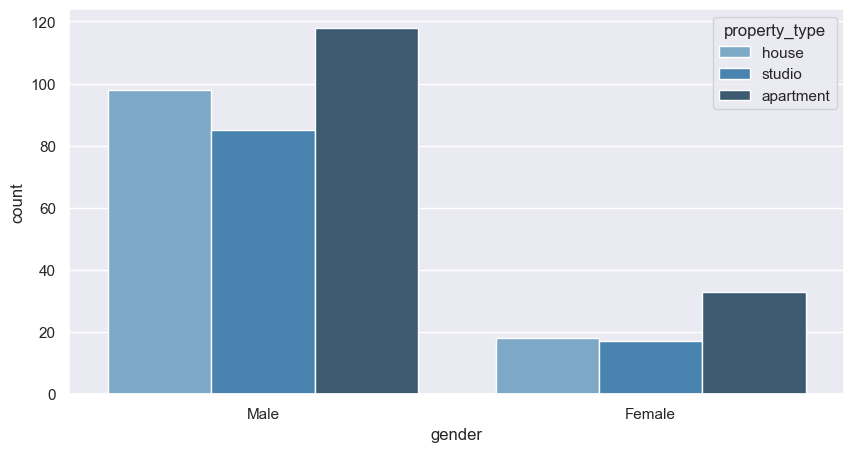

In [284]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df1['gender'], hue=df1['property_type'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height


## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

<AxesSubplot:xlabel='loan_term_month', ylabel='count'>

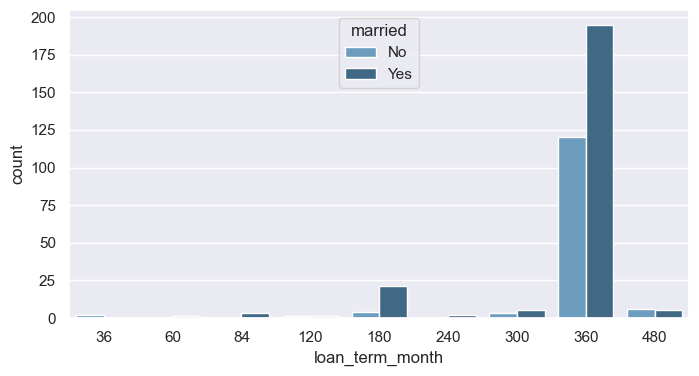

In [285]:
fig = plt.figure(figsize=(8, 4))
sns.countplot(df1['loan_term_month'], hue=df1['married'], palette = 'Blues_d')

In [286]:
grouped2 = df1.groupby(['married', 'loan_amount', 'loan_term_month'])

In [287]:
result2 = grouped2.sum()
result2

phone_number  applicant_income  \
married loan_amount loan_term_month                                   
No      9000        360              6.287792e+11            2378.0   
        25000       120              6.281104e+11            3620.0   
        35000       360              6.285222e+10            1442.0   
        44000       360              6.281193e+11            4166.0   
        46000       360              6.285745e+11            2378.0   
...                                           ...               ...   
Yes     243000      360              6.287779e+11            3510.0   
        246000      360              6.285663e+11            8333.0   
        250000      360              6.281184e+11            6065.0   
        253000      360              6.281158e+11            8072.0   
        255000      360              6.281354e+10            4583.0   

                                     coapplicant_income  loan_term_year  \
married loan_amount loan_term_month                                       
No      9000        360                             0.0              30   
        25000       120                             0.0              10   
        35000       360                             0.0              30   
        44000       360                             0.0              30   
        46000       360                             0.0              30   
...                                                 ...             ...   
Yes     243000      360                          4416.0              30   
        246000      360                             0.0              30   
        250000      360                          2004.0              30   
        253000      360                           240.0              30   
        255000      360                          5625.0              30   

                                     credit_history  
married loan_amount loan_term_month                  
No      9000        360                         1.0  
        25000       120                         1.0  
        35000       360                         1.0  
        44000       360                         1.0  
        46000       360                         1.0  
...                                             ...  
Yes     243000      360                         1.0  
        246000      360                         1.0  
        250000      360                         1.0  
        253000      360                         1.0  
        255000      360                         1.0  

[229 rows x 5 columns]

## Kesimpulan

- kebanyakan yang mengajukan loan adalah seorang laki-laki yang sudah memiliki gelar, dan sudah menikah
- kebanyakn pengaju pinjaman adalah yang sudah menikah banyak yang memilih jangka waktu pinjaman sebanyak 360 bulan/ 30 tahun